In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

C:\Users\abhay\AppData\Local\Temp\ipykernel_11212\2488567651.py:4: RuntimeWarning: divide by zero encountered in log
  Log_transformed_image = (c/math.log(1+np.max(image)))*(np.log(1 + image))
C:\Users\abhay\AppData\Local\Temp\ipykernel_11212\2488567651.py:5: RuntimeWarning: invalid value encountered in cast
  Log_transformed_image = Log_transformed_image.astype(np.uint8)


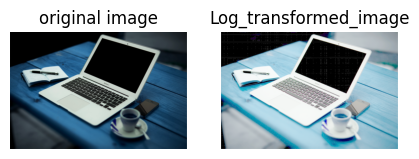

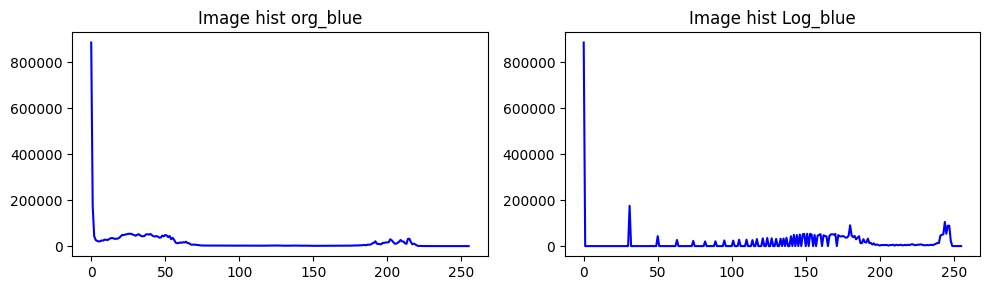

In [37]:
# Log Transformation
image = cv2.imread('Huge-Backgrounds-63.jpg')
c = 255 # play with c to get amazing images 
Log_transformed_image = (c/math.log(1+np.max(image)))*(np.log(1 + image))
Log_transformed_image = Log_transformed_image.astype(np.uint8)

plt.figure(figsize = (5,5))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('original image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Log_transformed_image')
plt.imshow(Log_transformed_image)


B_histo_org = cv2.calcHist([image],[0], None, [256], [0,256])
G_histo_org = cv2.calcHist([image],[1], None, [256], [0,256])
R_histo_org = cv2.calcHist([image],[2], None, [256], [0,256])

B_histo_Log = cv2.calcHist([Log_transformed_image],[0], None, [256], [0,256])
G_histo_Log = cv2.calcHist([Log_transformed_image],[1], None, [256], [0,256])
R_histo_Log = cv2.calcHist([Log_transformed_image],[2], None, [256], [0,256])


plt.figure(figsize = (10,3))
plt.subplot(1, 2, 1)
plt.title("Image hist org_blue")
#plt.xlim([0,100])
plt.plot(B_histo_org, 'b')
plt.subplot(1, 2, 2)
plt.title("Image hist Log_blue")
#plt.xlim([0,100])
plt.plot(B_histo_Log, 'b')
plt.tight_layout()

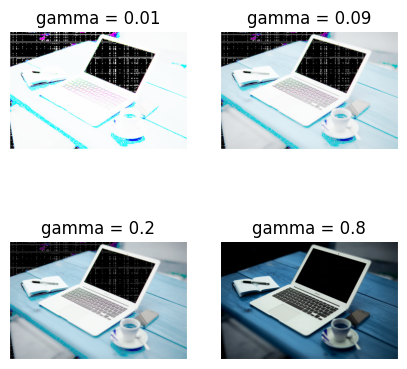

In [39]:
# power gamma law transformation
# Apply gamma correction. 
gamma_corrected_1 = np.array(255*(image / 255) ** 0.01, dtype = 'uint8') 
gamma_corrected_2 = np.array(255*(image / 255) ** 0.09, dtype = 'uint8') 
gamma_corrected_3 = np.array(255*(image / 255) ** 0.2, dtype = 'uint8') 
gamma_corrected_4 = np.array(255*(image / 255) ** 0.8, dtype = 'uint8') 

plt.figure(figsize = (5,5))

plt.subplot(2,2,1)
plt.axis(False)
plt.title("gamma = 0.01")
plt.imshow(gamma_corrected_1)

plt.subplot(2,2,2)
plt.axis(False)
plt.title("gamma = 0.09")
plt.imshow(gamma_corrected_2)

plt.subplot(2,2,3)
plt.title("gamma = 0.2")
plt.axis(False)
plt.imshow(gamma_corrected_3)

plt.subplot(2,2,4)
plt.title("gamma = 0.8")
plt.axis(False)
plt.imshow(gamma_corrected_4)


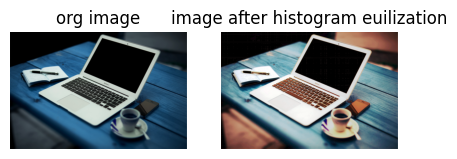

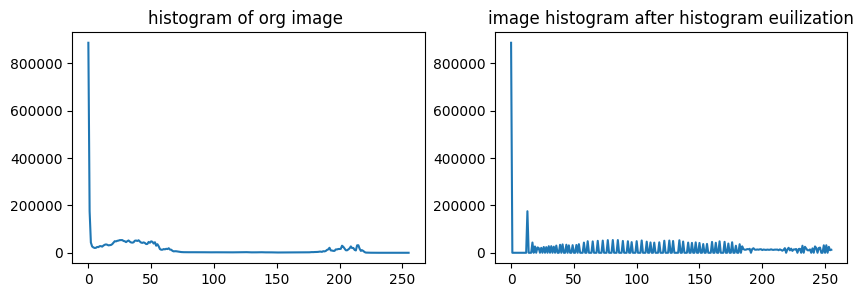

In [45]:
#histogram equilization
histequilze_image_b = cv2.equalizeHist(image[:,:,0])
histequilze_image_g = cv2.equalizeHist(image[:,:,1])
histequilze_image_r = cv2.equalizeHist(image[:,:,2])

imagehist_equilized = cv2.calcHist([histequilze_image_b],[0], None, [256], [0,256])
hist_org_image = cv2.calcHist([image],[0],None,[256],[0,256])

histequilize_image = cv2.merge([histequilze_image_b,histequilze_image_g,histequilze_image_r])

plt.figure(figsize = (5,5))

plt.subplot(1,2,1)
plt.axis(False)
plt.title("org image")
plt.imshow(image)

plt.subplot(1,2,2)
plt.axis(False)
plt.title("image after histogram euilization")
plt.imshow(histequilize_image)

plt.figure(figsize = (10,3))

plt.subplot(1,2,1)
plt.title("histogram of org image ")
plt.plot(hist_org_image)

plt.subplot(1,2,2)
plt.title("image histogram after histogram euilization")
plt.plot(imagehist_equilized)


